In [5]:
library("pander")
library("tidyverse")
library("knitr")
library("car")
library("reshape2")
library("ggplot2")
library('gridExtra')
library("plyr")
PC1_less<- read_csv('~/Google Drive/WIN_Matter/analysis/data/PC1_lesser_sigOnly_fibers_grubbs.csv')
PC1_less<- mutate(PC1_less, tx_code=factor(tx_code, 
                  levels=1:3, 
                  labels=c("DIET","MOD-PA","HIGH-PA")))

            

PC1_great<- read_csv('~/Google Drive/WIN_Matter/analysis/data/PC1_greater_sigOnly_fibers_grubbs.csv')
PC1_great<- mutate(PC1_great, tx_code=factor(tx_code, 
                  levels=1:3, 
                  labels=c("DIET","MOD-PA","HIGH-PA")))

PC2_great<- read_csv('~/Google Drive/WIN_Matter/analysis/data/PC2_greater_sigOnly_fibers_grubbs.csv')
PC2_great<- mutate(PC2_great, tx_code=factor(tx_code, 
                  levels=1:3, 
                  labels=c("DIET","MOD-PA","HIGH-PA")))

PC2_less<- read_csv('~/Google Drive/WIN_Matter/analysis/data/PC2_lesser_sigOnly_fibers_grubbs.csv')
PC2_less<- mutate(PC2_less, tx_code=factor(tx_code, 
                  levels=1:3, 
                  labels=c("DIET","MOD-PA","HIGH-PA")))

Parsed with column specification:
cols(
  sub_id = col_character(),
  tx_code = col_double(),
  Age = col_double(),
  Sex = col_double(),
  deltaFD = col_double(),
  IGT_p_diff = col_double(),
  IGT_q_diff = col_double(),
  TS_RT_diff = col_double(),
  TS_ACC_diff = col_double(),
  stroop_int_diff = col_double(),
  stroop_fac_diff = col_double(),
  nback_RT_diff = col_double(),
  nback_ACC_diff = col_double(),
  PC1 = col_double(),
  PC2 = col_double(),
  PC3 = col_double(),
  fiberMean = col_double()
)
Parsed with column specification:
cols(
  sub_id = col_character(),
  tx_code = col_double(),
  Age = col_double(),
  Sex = col_double(),
  deltaFD = col_double(),
  IGT_p_diff = col_double(),
  IGT_q_diff = col_double(),
  TS_RT_diff = col_double(),
  TS_ACC_diff = col_double(),
  stroop_int_diff = col_double(),
  stroop_fac_diff = col_double(),
  nback_RT_diff = col_double(),
  nback_ACC_diff = col_double(),
  PC1 = col_double(),
  PC2 = col_double(),
  PC3 = col_double(),
  fiberMean

In [6]:
#kirks analysis blending both exercise groups into one
#PC1_less$tx_code=revalue(PC1_less$tx_code, c("D"="D", "D+M"="D+E","D+H"="D+E"))
#PC1_great$tx_code=revalue(PC1_great$tx_code, c("D"="D", "D+M"="D+E","D+H"="D+E"))
#PC2_less$tx_code=revalue(PC2_less$tx_code, c("D"="D", "D+M"="D+E","D+H"="D+E"))
#PC2_great$tx_code=revalue(PC2_great$tx_code, c("D"="D", "D+M"="D+E","D+H"="D+E"))

In [7]:
#PC1_less



|    &nbsp;     | Df | Sum Sq | Mean Sq | F value | Pr(>F) |
|:-------------:|:--:|:------:|:-------:|:-------:|:------:|
|  **tx_code**  | 2  | 0.0329 | 0.0165  |  0.522  | 0.595  |
| **Residuals** | 88 |  2.77  | 0.0315  |   NA    |   NA   |

Table: Anova Mean Fiber by Exercise vs Diet PC1(-)



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fiberMean ~ tx_code, data = PC1_less)

$tx_code
                       diff         lwr       upr     p adj
MOD-PA-DIET    -0.039983819 -0.15513554 0.0751679 0.6868526
HIGH-PA-DIET    0.007607635 -0.09430533 0.1095206 0.9826952
HIGH-PA-MOD-PA  0.047591455 -0.06821202 0.1633949 0.5915494


quartz_off_screen 
                3

pdf 
  2



|tx_code |        Min|         Q1|     Median|       Mean|        Q3|       Max|        SD|  N|
|:-------|----------:|----------:|----------:|----------:|---------:|---------:|---------:|--:|
|DIET    | -0.5686396| -0.0951011|  0.0116516|  0.0019591| 0.1057727| 0.3948898| 0.2102316| 35|
|MOD-PA  | -0.4961417| -0.0911905| -0.0235157| -0.0380248| 0.0173694| 0.2418784| 0.1632106| 22|
|HIGH-PA | -0.3624353| -0.0964626|  0.0116084|  0.0095667| 0.0854067| 0.2840294| 0.1468218| 36|
|NA      |  0.3207206|  0.3207206|  0.3207206|  0.3207206| 0.3207206| 0.3207206|        NA|  1|

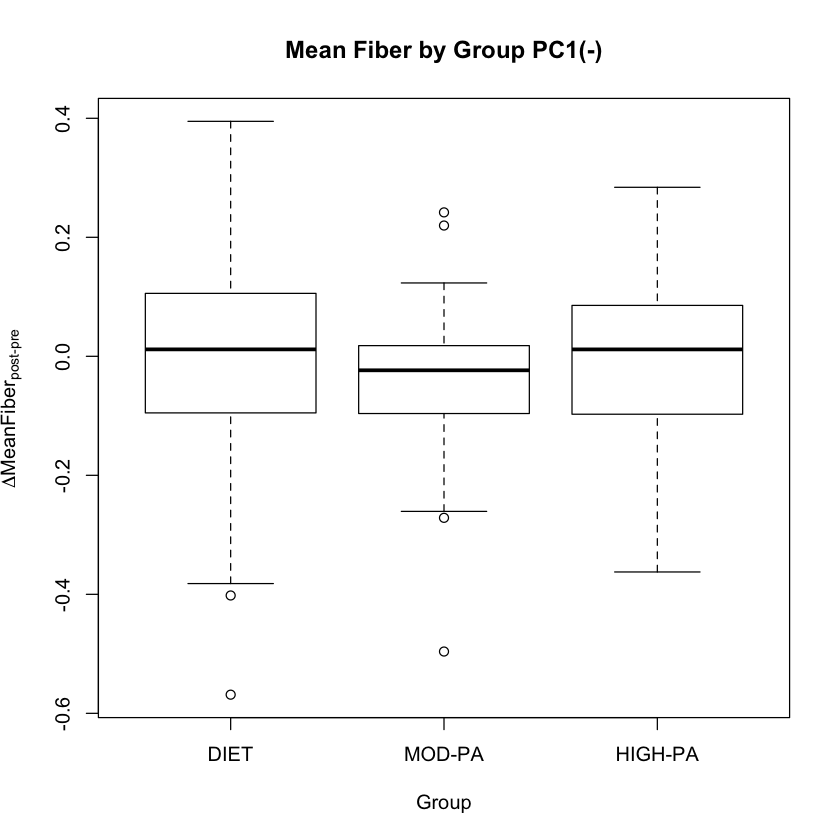

In [8]:
#PC1 lesser anova 
PC1_less_aov<-aov(fiberMean~tx_code, data=PC1_less)
#summary(PC1_less.aov)
pander(PC1_less_aov, digits=3, format="pandoc", caption="Anova Mean Fiber by Exercise vs Diet PC1(-)")

TukeyHSD(PC1_less_aov)

# Create Boxplot
boxplot(fiberMean ~ tx_code, data = PC1_less,
        xlab = "Group", ylab = expression(paste(Delta,'MeanFiber'['post-pre'])),
        main = "Mean Fiber by Group PC1(-)")
dev.copy(png, '~/Google Drive/WIN_Matter/analysis/output/images/pc1_less_tx_code_collapsed.jpg')
dev.off()
# Calculate Descriptive Statistics
summary_PC1less_group <- PC1_less %>%
                                    group_by(tx_code) %>%
                                    dplyr::summarize(Min  = min(fiberMean, na.rm = TRUE),
                                                     Q1 = quantile(fiberMean, na.rm=TRUE)[2],
                                                     Median = quantile(fiberMean, na.rm=TRUE)[3],
                                                     Mean = mean(fiberMean, na.rm = TRUE),
                                                     Q3 = quantile(fiberMean, na.rm=TRUE)[4],
                                                     Max = max(fiberMean, na.rm = TRUE),
                                                     SD = sd(fiberMean, na.rm = TRUE),
                                                     N = n()
                                                     )

kable(summary_PC1less_group)





|    &nbsp;     | Df | Sum Sq  | Mean Sq  | F value | Pr(>F) |
|:-------------:|:--:|:-------:|:--------:|:-------:|:------:|
|  **tx_code**  | 2  | 0.00102 | 0.000508 | 0.0158  | 0.984  |
| **Residuals** | 90 |   2.9   |  0.0322  |   NA    |   NA   |

Table: Anova Mean Fiber by Exercise vs Diet PC1(+)



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fiberMean ~ tx_code, data = PC1_great)

$tx_code
                       diff        lwr        upr     p adj
MOD-PA-DIET    -0.003733702 -0.1201116 0.11264418 0.9967825
HIGH-PA-DIET   -0.007562938 -0.1090995 0.09397358 0.9827832
HIGH-PA-MOD-PA -0.003829236 -0.1195816 0.11192310 0.9965795


quartz_off_screen 
                3

pdf 
  2



|tx_code |        Min|         Q1|     Median|      Mean|        Q3|       Max|        SD|  N|
|:-------|----------:|----------:|----------:|---------:|---------:|---------:|---------:|--:|
|DIET    | -0.3570442| -0.0535511|  0.0219388| 0.0470676| 0.2033511| 0.3978233| 0.1717383| 35|
|MOD-PA  | -0.2830192| -0.0724418|  0.0415265| 0.0433338| 0.1568038| 0.3634938| 0.1626431| 22|
|HIGH-PA | -0.3791396| -0.0729594| -0.0006510| 0.0395046| 0.0895746| 0.5467867| 0.1957502| 36|
|NA      |  0.2189651|  0.2189651|  0.2189651| 0.2189651| 0.2189651| 0.2189651|        NA|  1|

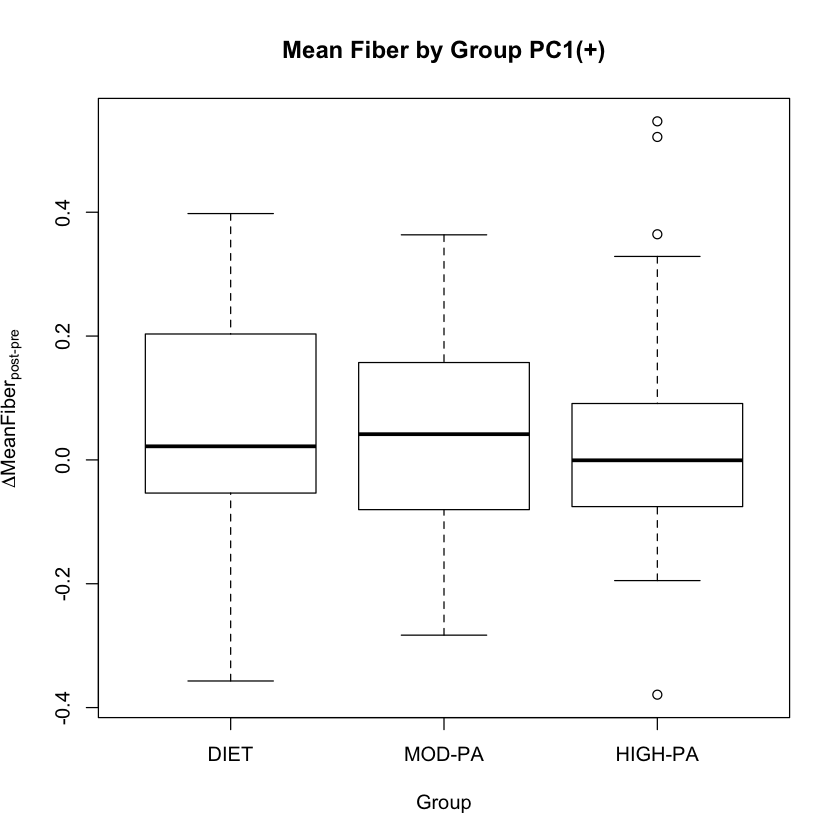

In [4]:
#PC1 greater anova 
PC1_great.aov<-aov(fiberMean~tx_code, data=PC1_great)
#summary(PC1_great.aov)
pander(PC1_great.aov, digits=3, format="pandoc", caption="Anova Mean Fiber by Exercise vs Diet PC1(+)")

TukeyHSD(PC1_great.aov)

# Create Boxplot
boxplot(fiberMean ~ tx_code, data = PC1_great,
        xlab = "Group", ylab = expression(paste(Delta,'MeanFiber'['post-pre'])),
        main = "Mean Fiber by Group PC1(+)")
dev.copy(png, '~/Google Drive/WIN_Matter/analysis/output/images/pc1_great_tx_code_collapsed.jpg')
dev.off()
# Calculate Descriptive Statistics
summary_PC1great_group <- PC1_great %>%
                                    group_by(tx_code) %>%
                                    dplyr::summarize(Min  = min(fiberMean, na.rm = TRUE),
                                                     Q1 = quantile(fiberMean, na.rm=TRUE)[2],
                                                     Median = quantile(fiberMean, na.rm=TRUE)[3],
                                                     Mean = mean(fiberMean, na.rm = TRUE),
                                                     Q3 = quantile(fiberMean, na.rm=TRUE)[4],
                                                     Max = max(fiberMean, na.rm = TRUE),
                                                     SD = sd(fiberMean, na.rm = TRUE),
                                                     N = n()
                                                     )

kable(summary_PC1great_group)





|    &nbsp;     | Df | Sum Sq  | Mean Sq | F value | Pr(>F) |
|:-------------:|:--:|:-------:|:-------:|:-------:|:------:|
|  **tx_code**  | 2  | 0.00912 | 0.00456 |  0.117  |  0.89  |
| **Residuals** | 90 |   3.5   | 0.0389  |   NA    |   NA   |

Table: Anova Mean Fiber by Exercise vs Diet PC2(-)



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fiberMean ~ tx_code, data = PC2_less)

$tx_code
                       diff        lwr       upr     p adj
MOD-PA-DIET    -0.021823717 -0.1497680 0.1061205 0.9130413
HIGH-PA-DIET   -0.019453864 -0.1310817 0.0921740 0.9094089
HIGH-PA-MOD-PA  0.002369853 -0.1248867 0.1296264 0.9989147


null device 
          1



|tx_code |        Min|         Q1|     Median|       Mean|         Q3|        Max|        SD|  N|
|:-------|----------:|----------:|----------:|----------:|----------:|----------:|---------:|--:|
|DIET    | -0.3185925| -0.0852478|  0.0247633|  0.0398706|  0.1622893|  0.3693577| 0.1810278| 35|
|MOD-PA  | -0.5281584| -0.0562670|  0.0797822|  0.0180469|  0.1601751|  0.3454600| 0.2092967| 22|
|HIGH-PA | -0.4291814| -0.0937911| -0.0035440|  0.0204167|  0.1391619|  0.4379696| 0.2049589| 36|
|NA      | -0.2092732| -0.2092732| -0.2092732| -0.2092732| -0.2092732| -0.2092732|        NA|  1|

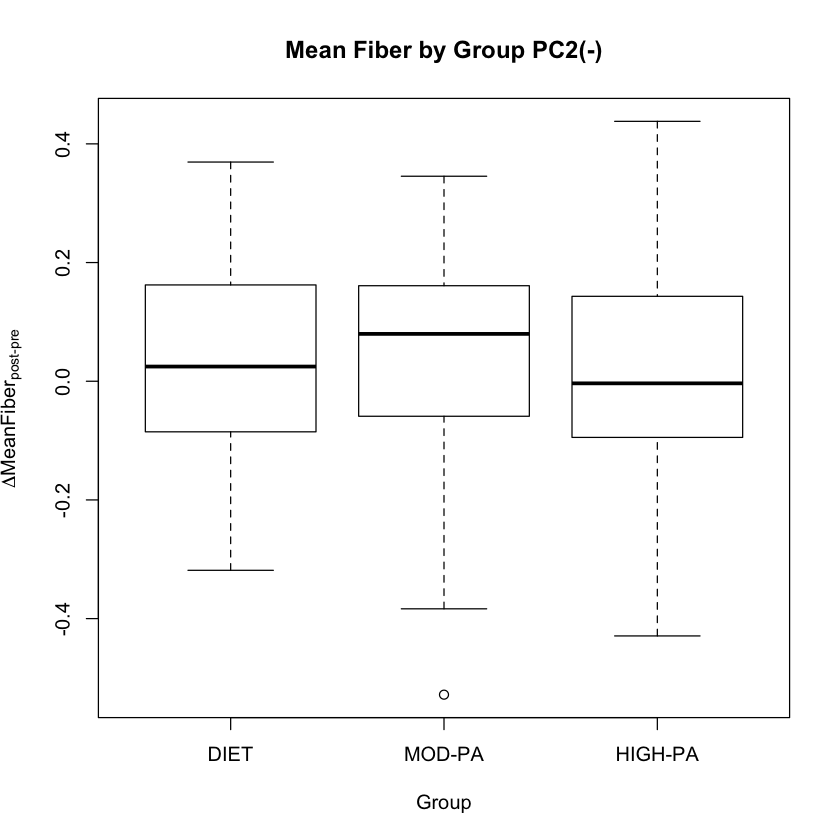

In [10]:
#PC2 lesser anova 
PC2_less.aov<-aov(fiberMean~tx_code, data=PC2_less)
#summary(PC2_less.aov)
pander(PC2_less.aov, digits=3, format="pandoc", caption="Anova Mean Fiber by Exercise vs Diet PC2(-)")

TukeyHSD(PC2_less.aov)

# Create Boxplot
boxplot(fiberMean ~ tx_code, data = PC2_less,
        xlab = "Group", ylab = expression(paste(Delta,'MeanFiber'['post-pre'])),
        main = "Mean Fiber by Group PC2(-)")
#dev.copy(png, '~/Google Drive/WIN_Matter/analysis/output/images/pc2_less_tx_code_collapsed.jpg')
dev.off()
# Calculate Descriptive Statistics
summary_PC2less_group <- PC2_less %>%
                                    group_by(tx_code) %>%
                                    dplyr::summarize(Min  = min(fiberMean, na.rm = TRUE),
                                                     Q1 = quantile(fiberMean, na.rm=TRUE)[2],
                                                     Median = quantile(fiberMean, na.rm=TRUE)[3],
                                                     Mean = mean(fiberMean, na.rm = TRUE),
                                                     Q3 = quantile(fiberMean, na.rm=TRUE)[4],
                                                     Max = max(fiberMean, na.rm = TRUE),
                                                     SD = sd(fiberMean, na.rm = TRUE),
                                                     N = n()
                                                     )

kable(summary_PC2less_group)




|    &nbsp;     | Df | Sum Sq | Mean Sq | F value | Pr(>F) |
|:-------------:|:--:|:------:|:-------:|:-------:|:------:|
|  **tx_code**  | 2  | 0.0958 | 0.0479  |  0.617  | 0.542  |
| **Residuals** | 90 |  6.98  | 0.0776  |   NA    |   NA   |

Table: Anova Mean Fiber by Exercise vs Diet PC2(+)



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fiberMean ~ tx_code, data = PC2_great)

$tx_code
                      diff         lwr       upr     p adj
MOD-PA-DIET    -0.06846366 -0.24908933 0.1121620 0.6396487
HIGH-PA-DIET    0.01193772 -0.14565325 0.1695287 0.9821982
HIGH-PA-MOD-PA  0.08040138 -0.09925342 0.2600562 0.5372426


null device 
          1



|tx_code |        Min|         Q1|     Median|       Mean|        Q3|       Max|        SD|  N|
|:-------|----------:|----------:|----------:|----------:|---------:|---------:|---------:|--:|
|DIET    | -0.4435978| -0.0910761|  0.0983621|  0.0564969| 0.2086293| 0.5070377| 0.2364404| 35|
|MOD-PA  | -0.5334460| -0.1998506| -0.0887938| -0.0119668| 0.1608018| 0.6202166| 0.2949216| 22|
|HIGH-PA | -0.6430242| -0.1171736|  0.0394110|  0.0684346| 0.2542271| 0.7491758| 0.3050602| 36|
|NA      |  0.5252896|  0.5252896|  0.5252896|  0.5252896| 0.5252896| 0.5252896|        NA|  1|

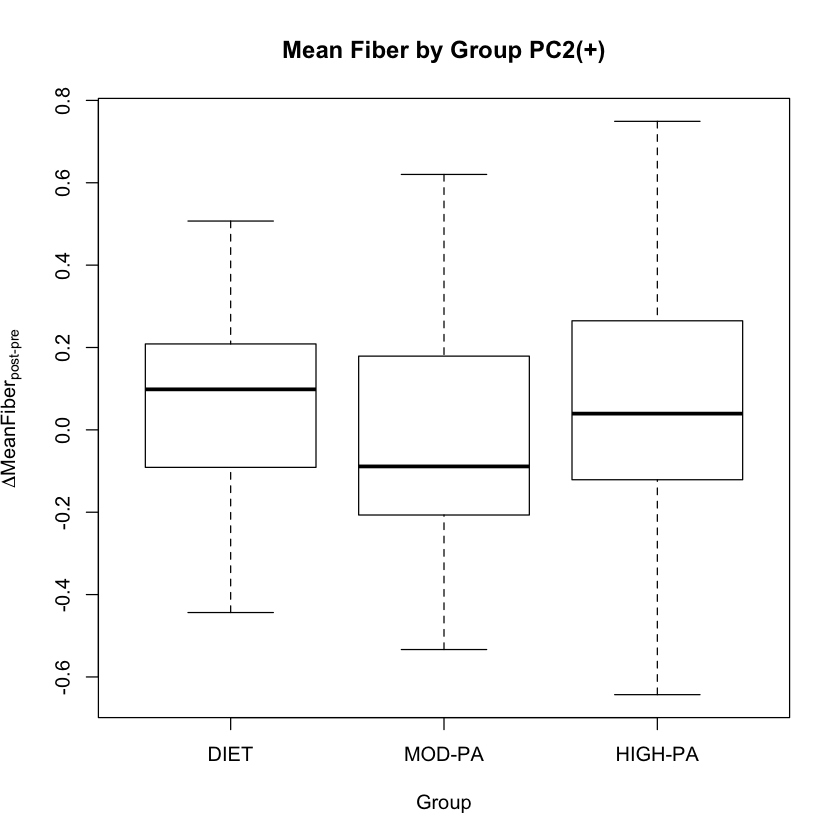

In [11]:
#PC2 greater anova 
PC2_great.aov<-aov(fiberMean~tx_code, data=PC2_great)
#summary(PC2_great.aov)
pander(PC2_great.aov, digits=3, format="pandoc", caption="Anova Mean Fiber by Exercise vs Diet PC2(+)")

TukeyHSD(PC2_great.aov)

# Create Boxplot
boxplot(fiberMean ~ tx_code, data = PC2_great,
        xlab = "Group", ylab = expression(paste(Delta,'MeanFiber'['post-pre'])),
        main = "Mean Fiber by Group PC2(+)")
#dev.copy(png, '~/Google Drive/WIN_Matter/analysis/output/images/pc2_great_tx_code_collapsed.jpg')
dev.off()
# Calculate Descriptive Statistics
summary_PC2great_group <- PC2_great %>%
                                    group_by(tx_code) %>%
                                    dplyr::summarize(Min  = min(fiberMean, na.rm = TRUE),
                                                     Q1 = quantile(fiberMean, na.rm=TRUE)[2],
                                                     Median = quantile(fiberMean, na.rm=TRUE)[3],
                                                     Mean = mean(fiberMean, na.rm = TRUE),
                                                     Q3 = quantile(fiberMean, na.rm=TRUE)[4],
                                                     Max = max(fiberMean, na.rm = TRUE),
                                                     SD = sd(fiberMean, na.rm = TRUE),
                                                     N = n()
                                                     )

kable(summary_PC2great_group)

